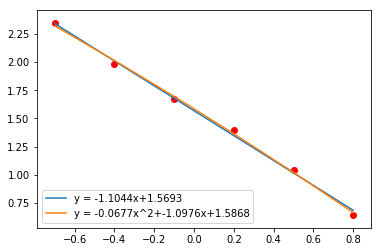

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def get_data(filename):
    points = []
    values = []
    try:
        with open(filename) as f:
            points = list(map(float, f.readline().split()))
            values = list(map(float, f.readline().split()))
    except IOError:
        print('Problem with file')
        sys.exit(1)
    except ValueError:
        print('Incorrect file format')
        sys.exit(1)
    return points, values

points, values = get_data('test1.txt')

def mls(n, points, values):
    mat = np.zeros((n+1, n+1))
    b = np.zeros(n+1)
    N = len(points)-1
    for i in range(n+1):
        for j in range(n+1):
            mat[i, j] = np.sum(list(map(lambda a: a**(i+j), points)))
        b[i] = np.sum([values[k]*points[k]**i for k in range(len(points))])
    coefs = np.linalg.solve(mat, b)
    #print("Matrix:\n{0}".format(mat))
    #print("a:", coefs)
    return coefs

coefs1 = mls(1, points, values)
coefs2 = mls(2, points, values)

def sum_squared_errors(F, values):
    return sum([(f_i - y_i) ** 2 for f_i, y_i in zip(F, values)])

def F(coefs, points):
    return sum([points ** i * c for i, c in enumerate(coefs)])

n = len(points) - 1

y_vals_from_polynomial1 = list(F(coefs1, points[i]) for i in range(n+1))
err1 = sum_squared_errors(y_vals_from_polynomial1, values)

y_vals_from_polynomial2 = list(F(coefs2, points[i]) for i in range(n+1))
err2 = sum_squared_errors(y_vals_from_polynomial2, values)
#print("F1: ", coefs1, "err1: ", err1)
#print("F2: ", coefs2, "err2: ", err2)

line1, = plt.plot(points, y_vals_from_polynomial1, label="y = {0}x+{1}".format(coefs1[1].round(4), coefs1[0].round(4)))
line2, = plt.plot(points, y_vals_from_polynomial2, label="y = {0}x^2+{1}x+{2}".format(coefs2[2].round(4), coefs2[1].round(4), coefs2[0].round(4)))
plt.legend(handles=[line1, line2], loc='lower left')
plt.scatter(points, values, color='r')
plt.show()